<a href="https://colab.research.google.com/github/sberniz/FlyngSaferThanBefore/blob/master/Santiago_Berniz_Flying_has_gotten_safer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Library Imports 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px #Plotly Express
import plotly.io as pio #To convert to html
import plotly.graph_objects as go #plotly go 

In [ ]:
#load plane crash data worldwide from 1908 till 2019
plane_crash = pd.read_csv('https://raw.githubusercontent.com/sberniz/FlyingvsDriving/master/data/plane_crash_2019.csv')
plane_crash.head()

In [ ]:
plane_crash['Date'] = pd.to_datetime(plane_crash['Date'],infer_datetime_format=True) #convert the Date column to datetime format
plane_crash.head()

In [ ]:
plane_crash['year'] = plane_crash['Date'].dt.year #create a new column/feature with only the year out of the date to calculate per year analysis
plane_crash.head()

In [ ]:
#Filters out Airshow, and Military planes, since the risky maneuvers of both will interfere with Data for regular general aviation and passanger flights
plane_crash = plane_crash[((plane_crash['Operator'].str.contains('Military',na=False,regex=True)) == False) & ((plane_crash['Route'].str.contains('Airshow',na=False,regex=True)) == False) & ((plane_crash['Route'].str.contains('Air show',na=False,regex=True)) == False)]
print(plane_crash.shape)
plane_crash.head()

In [ ]:
#add percentage fatalities per flight. and Checks it has been added
plane_crash['percentage fatalities'] = (plane_crash['Fatalities']  / plane_crash['Aboard'])*100
plane_crash.head()

In [ ]:
#Creates new dataframe with Only those accidents where Fatalitie was 100%
#everyone Invlolved Died. 
plane_crash_total_fatalities = plane_crash[plane_crash['percentage fatalities'] == 100]
print(plane_crash_total_fatalities.shape)
plane_crash_total_fatalities.head()

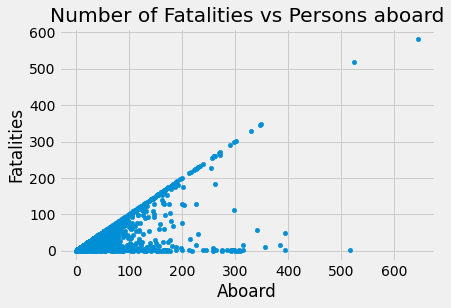

In [ ]:
#Exploratory graph to check for Fatalities vs Personsa board.
plane_crash.plot.scatter('Aboard','Fatalities',title="Number of Fatalities vs Persons aboard");

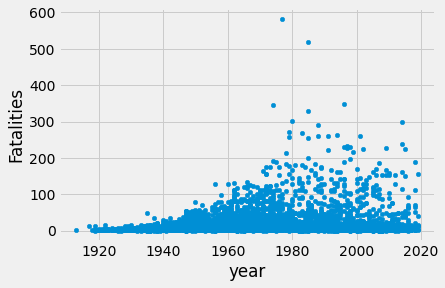

In [ ]:
#compares Fatalities with Years couple of outliers on scotterplot by 1980
plane_crash.plot.scatter('year','Fatalities');

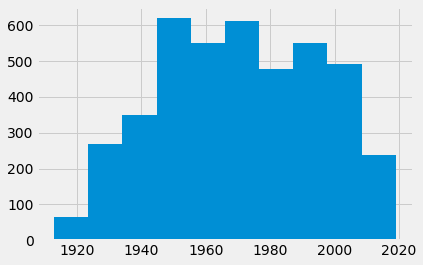

In [ ]:
plane_crash['year'].hist();

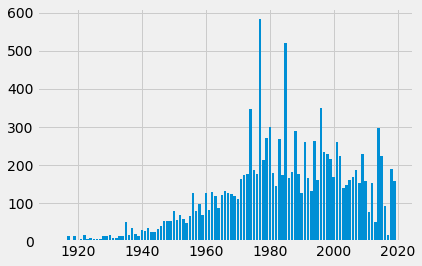

In [ ]:
fig, ax = plt.subplots()
ax.bar(x=plane_crash['year'], height=plane_crash['Fatalities'])
plt.show()

In [ ]:
plane_crash[plane_crash['Fatalities'] > 0 ]

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities,year_str
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,100.000000,1913
17,1917-06-17,NaN,"Near Yarmouth, England",NaN,NaN,NaN,Zepplin LZ-95 (air ship),L-48,NaN,16.0,NaN,NaN,14.0,NaN,NaN,0.0,Shot down by aircraft.,1917,87.500000,1917
23,1918-12-16,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Carl Smith was killed when his mail plane feet...,1918,100.000000,1918
24,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,1919,100.000000,1919
25,1919-07-19,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The mail plane crashed under unknown circumsta...,1919,100.000000,1919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,2019-03-09,10:40,"Vereda La Bendicion, Colombia",Laser Aereo Colombia,NaN,San Jose - Villavicencio,Douglas DC-3,HK-2494,:33105/16357,14.0,11.0,3.0,14.0,11.0,3.0,0.0,"While on approach to land, the crew contacted ...",2019,100.000000,2019
4961,2019-03-10,08:44,"Bishoftu, Ethiopia",Ethiopian Airlines,302,Addis Ababa - Nairobi,Boeing 737 Max 8,ET-AVJ,63450/7243,157.0,149.0,8.0,157.0,149.0,8.0,0.0,The internationally scheduled airliner crashed...,2019,100.000000,2019
4962,2019-04-16,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p...",2019,100.000000,2019
4963,2019-05-05,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...,2019,100.000000,2019


In [ ]:
def grouping(df):
  dupes = {}
  for c in df:
    if c == 'year':
      gb = df.groupby(c).size()
      dupes[c] = gb[gb >= 0]
  return dupes

In [ ]:
plane_crash_aboard_year = plane_crash.groupby(['year'])['Aboard'].sum().reset_index()
plane_crash_aboard_year.tail()

,year,Aboard
99,2015,652.0
100,2016,881.0
101,2017,119.0
102,2018,898.0
103,2019,287.0


In [ ]:
plane_crash_fatalities_year = plane_crash.groupby(['year'])['Fatalities'].sum().reset_index()
plane_crash_fatalities_year.tail()

,year,Fatalities
99,2015,615.0
100,2016,493.0
101,2017,88.0
102,2018,533.0
103,2019,249.0


In [ ]:
crash_year = {}
crash_year = grouping(plane_crash[plane_crash['Fatalities'] > 0])

In [ ]:
crash_year['crashes'] = crash_year.pop('year')

In [ ]:
crash_year

{'crashes': year
 1913     1
 1917     1
 1918     1
 1919     8
 1920    18
         ..
 2015    15
 2016    21
 2017    14
 2018    13
 2019     7
 Length: 104, dtype: int64}

In [ ]:
plane_crash_per_year = pd.DataFrame(dupes)
print(plane_crash_per_year.shape)
plane_crash_per_year.head()

(105, 1)


,crashes
year,
1909,1
1913,1
1917,1
1918,1
1919,9


In [ ]:
plane_crash_per_year = plane_crash_per_year.reset_index()
plane_crash_per_year.head()

,year,crashes
0,1909,1
1,1913,1
2,1917,1
3,1918,1
4,1919,9


In [ ]:
plane_crash_aboard_year = plane_cras

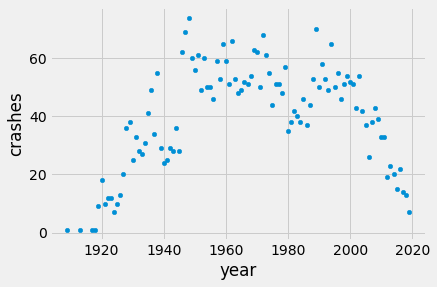

In [ ]:
plane_crash_per_year.plot.scatter('year','crashes')

In [ ]:
# num of people in plane 
plane_crash_aboard_fat_num = pd.merge(plane_crash_per_year,plane_crash_aboard_year, on='year',how='inner')
plane_crash_aboard_fat_num = pd.merge(plane_crash_aboard_fat_num,plane_crash_fatalities_year, on='year',how='inner')

plane_crash_aboard_fat_num.tail()

,year,crashes,Aboard,Fatalities
99,2015,15,652.0,615.0
100,2016,22,881.0,493.0
101,2017,14,119.0,88.0
102,2018,13,898.0,533.0
103,2019,7,287.0,249.0


In [ ]:
plane_crash_aboard_fat_num['percentage_fatalities'] = (plane_crash_aboard_fat_num['Fatalities'] / plane_crash_aboard_fat_num['Aboard'])*100
plane_crash_aboard_fat_num.tail()

,year,crashes,Aboard,Fatalities,percentage_fatalities
99,2015,15,652.0,615.0,94.325153
100,2016,22,881.0,493.0,55.959137
101,2017,14,119.0,88.0,73.949580
102,2018,13,898.0,533.0,59.354120
103,2019,7,287.0,249.0,86.759582


In [ ]:
plane_crash_aboard_fat_num.describe()

,year,crashes,Aboard,Fatalities,percentage_fatalities
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,1967.471154,40.528846,1271.701923,874.115385,73.523848
std,30.217322,17.814555,918.682709,626.221607,13.994841
min,1913.000000,1.000000,1.000000,1.000000,28.401487
25%,1941.750000,28.000000,377.000000,255.750000,65.112139
50%,1967.500000,44.000000,1276.500000,889.000000,74.490128
75%,1993.250000,53.000000,1948.500000,1328.750000,81.409779
max,2019.000000,74.000000,3263.000000,2527.000000,115.000000


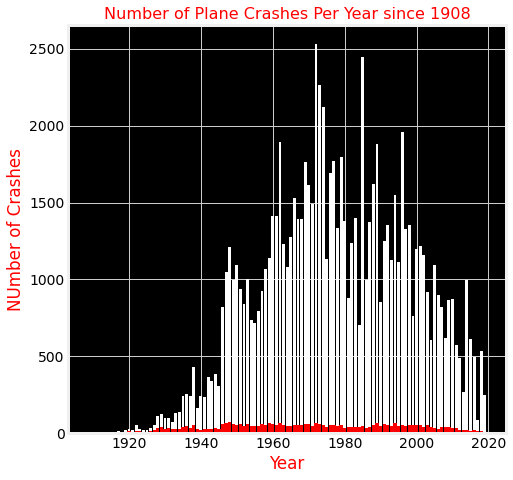

In [ ]:
#Visualization 1, Number of Crashes per year,to be saved to blog Post
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
fig.patch.set_facecolor('white')

ax.width = 500
ax.height= 500
ax.set_title("Number of Plane Crashes Per Year since 1908",fontsize='16',color='red')
ax.set_xlabel("Year",color='red')
ax.set_ylabel("NUmber of Crashes",color='red')
ax.bar(x=plane_crash_fatalities_year['year'],height=plane_crash_fatalities_year['Fatalities'] ,color='white')
ax.bar(x=plane_crash_per_year['year'],height=plane_crash_per_year['crashes'],width=0.9,color='red')

ax.set_facecolor('black')
plt.show()

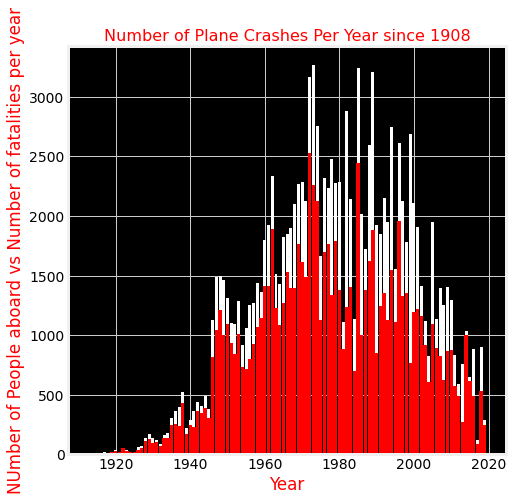

In [ ]:
#Visualization 1, Number of Crashes per year,to be saved to blog Post
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
fig.patch.set_facecolor('white')

ax.width = 500
ax.height= 500
ax.set_title("Number of Plane Crashes Per Year since 1908",fontsize='16',color='red')
ax.set_xlabel("Year",color='red')
ax.set_ylabel("NUmber of People aboard vs Number of fatalities per year",color='red')
ax.bar(x=plane_crash_aboard_fat_num['year'],height=plane_crash_aboard_fat_num['Aboard'] ,color='white')
ax.bar(x=plane_crash_aboard_fat_num['year'],height=plane_crash_aboard_fat_num['Fatalities'],width=0.9,color='red')

ax.set_facecolor('black')
plt.show()

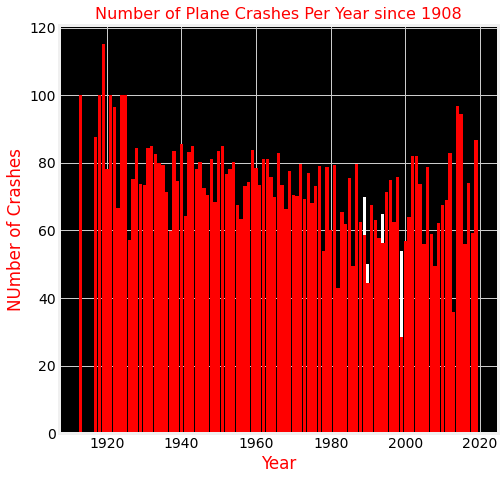

In [ ]:
#Visualization 1, Number of Crashes per year,to be saved to blog Post
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
fig.patch.set_facecolor('white')

ax.width = 500
ax.height= 500
ax.set_title("Number of Plane Crashes Per Year since 1908",fontsize='16',color='red')
ax.set_xlabel("Year",color='red')
ax.set_ylabel("NUmber of Crashes",color='red')
ax.bar(x=plane_crash_aboard_fat_num['year'],height=plane_crash_aboard_fat_num['crashes'] ,color='white')
ax.bar(x=plane_crash_aboard_fat_num['year'],height=plane_crash_aboard_fat_num['percentage_fatalities'],width=0.9,color='red')

ax.set_facecolor('black')
plt.show()

In [ ]:

fig = px.bar(plane_crash_per_year, x="year", y="crashes", title="Number of Plane Crashes Per Year",color='crashes')
fig.update_layout(xaxis_title = "Year",yaxis_title="Number of Crashes", title="Number of Plane Crashes 1908 - 2019")
fig.show()

In [ ]:
fig = px.bar(plane_crash_fatalities_year, x="year", y="Fatalities", title="Number of Plane Crashes Per Year",color='Fatalities')
fig.update_layout(xaxis_title = "Year",yaxis_title="Number of Fatalities", title="Number of Plane Crashes Fatalities 1908 - 2019")
fig.show()

In [ ]:
fig3 = px.bar(plane_crash_aboard_fat_num, x="year", y="Fatalities", title="Number of Plane Crashes Per Year")
px.bar(plane_crash_aboard_fat_num, x="year", y="Aboard", title="Number of Plane Crashes Per Year",color='Aboard',barmode='group')
fig3.update_layout( xaxis_title = "Year",yaxis_title="Number of Fatalities", title="Number of Plane Crashes Fatalities 1908 - 2019")
fig3.show()

In [ ]:

fig = go.Figure(data=[
    go.Bar(name='# of people involved in accident per year', x=plane_crash_aboard_fat_num['year'], y=plane_crash_aboard_fat_num['Aboard']),
    go.Bar(name='# of Fatalities Per year from those involved', x=plane_crash_aboard_fat_num['year'], y=plane_crash_aboard_fat_num['Fatalities'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
fig2 = px.bar()

In [ ]:

pio.write_html(fig, file='index.html', auto_open=True)

In [ ]:
#Need to calculate #of fatalities per year, (fataltiies per crash) and graph them to show difference. also clean data fro per year fatalities